In [11]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear  
# inline in the notebook rather than in a new window.
%matplotlib inline

# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# import the necessary packages
import cv2
import os
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# OpenCV Contours

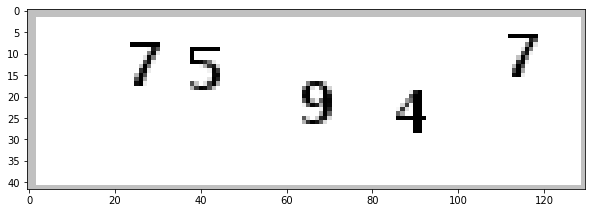

In [12]:
imagePath = './datasets/breaking-captcha/solved-captchas/75947.png'
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

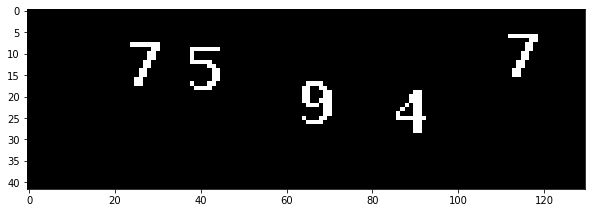

In [13]:
# threshold the image to reveal the digits
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(thresh)

[INFO] contour location 38, 9, 7, 10


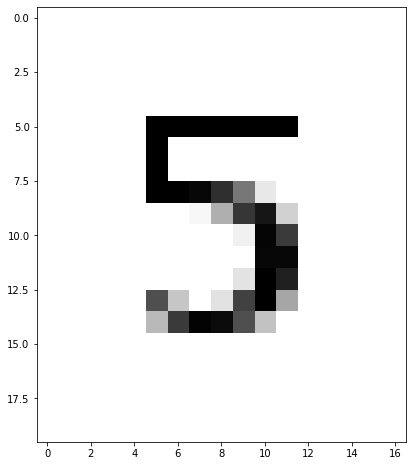

In [15]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
(x, y, w, h) = cv2.boundingRect(contours[-1])
print("[INFO] contour location {}, {}, {}, {}".format(x, y, w, h))
roi = gray[y - 5:y + h + 5, x - 5:x + w + 5]
plt.imshow(roi)

# Annotate